In [1]:
# pip install matplotlib numpy pandas

- Wykreślić zależności R = ƒ(t) dla przewodnika i półprzewodnika.
- Dla półprzewodnika wyznaczyć ln(1/R). Zamienić jednostkę temperatury na kelwiny oraz obliczyć (1/T).
- Wykonać wykres zależności ln (1/R) = ƒ(1/T).
- Wyznaczyć współczynnik nachylenia otrzymanej prostej wraz z jego błędem, wykorzystując metodę regresji liniowej.
- Wykorzystując obliczony współczynnik nachylenia, obliczyć energię aktywacji (EA). Wyznaczyć niepewność ΔEA. Otrzymany wynik wyrazić w dżulach oraz elektronowoltach

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker
from matplotlib.ticker import EngFormatter
import math, copy

In [3]:
blad_temperatury = 0.1 # [K]
##wsp_studenta_fishera_68 = [1, 1, 1.837,1.321,1.197,1.141,1.11,1.09,1.077,1.066,1.059]
stala_boltzmanna_J = 1.380649e-23 # J/K
stala_boltzmanna_eV = 8.617333262e-5 # eV/K

In [4]:
# class Metric:
#     def __init__(self,dictionary):
#         self.__dict__.update(dictionary)
#         self.error = max(3*np.std(values)*wsp_studenta_fishera_68[len(values)],self.error)

#     def __init__(self, values, error, unit):
#         self.values = values
#         self.error = max(3*np.std(values)*wsp_studenta_fishera_68[len(values)],error)
#         self.unit = unit


class PhysicsObject:

    def __init__(self, ascii_name, conjugated_name):
        self.ascii_name = ascii_name
        self.conjugated_name = conjugated_name
    

class Nic:
    pass

In [5]:
def signif(x, digits=6):
    if x == 0 or not math.isfinite(x):
        return x
    digits -= math.ceil(math.log10(abs(x)))
    return (round(x, digits), digits)

print(signif(1.72342e-22,2))

def phys_display(x,err):
    err1, d1 = signif(err,1)
    err, d = signif(err,2)
    if (err - err1)/err < 0.1 :
        err = err1
        d = d1

    x = round(x,d)
    return f"({x}±{err})"

(1.7e-22, 23)


In [6]:
def make_error_boxes(ax, xdata, ydata, xerror, yerror, facecolor='b',
                     edgecolor='none', alpha=0.5):

    # Loop over data points; create box from errors at each point
    errorboxes = [Rectangle((x - xe[0], y - ye[0]), xe.sum(), ye.sum())
                  for x, y, xe, ye in zip(xdata, ydata, xerror.T, yerror.T)]

    # Create patch collection with specified colour/alpha
    pc = PatchCollection(errorboxes, facecolor=facecolor, alpha=alpha,
                         edgecolor=edgecolor, zorder=2)

    # Add collection to axes
    ax.add_collection(pc)

    return ax


In [7]:
przewodnik = PhysicsObject("przewodnik", "przewodnika")
polprzewodnik = PhysicsObject("polprzewodnik", "półprzewodnika")

In [8]:
for object in [przewodnik, polprzewodnik]:
    object.plik = f"pomiary_{object.ascii_name}.csv"
    object.pomiary = pd.read_csv(object.plik)
    #print(object.pomiary)


In [9]:
for object in [przewodnik, polprzewodnik]:
    object.n = object.pomiary.shape[0]
    object.dane = pd.DataFrame()
    object.dane["T [K]"] = [e+274.15 for e in object.pomiary["T [°C]"]]
    object.dane["blad T [K]"] = [blad_temperatury]*object.n
    object.dane["R [Ω]"] = object.pomiary["R [Ω]"]
    object.dane["blad R [Ω]"] = object.pomiary["blad R [Ω]"]

    #print(object.dane)
    

In [10]:
for object in [przewodnik, polprzewodnik]:
    object.x = object.dane["T [K]"]
    object.xerr = np.array([object.dane["blad T [K]"], object.dane["blad T [K]"]])
    object.y = object.dane["R [Ω]"]
    object.yerr = np.array([object.dane["blad R [Ω]"], object.dane["blad R [Ω]"]])
    

In [11]:
for obiekt in [przewodnik]:
   
    # Calculate linear regression, intercept calculated normally
    degrees = [0,1] # model y = ax + b
    matrix = np.stack([obiekt.x**d for d in degrees], axis=-1)
    result = np.linalg.lstsq(matrix,obiekt.y,rcond=None)
    
    obiekt.a = result[0][1]
    obiekt.b = result[0][0]
    residuals = result[1][0]

    n = obiekt.n
    obiekt.blad_a = math.sqrt((residuals * n) / ((n-2)*(n*sum(obiekt.x**2) - (sum(obiekt.x))**2)))
    #Math.sqrt(se2/(n-2))*Math.sqrt(n/(n*sx2 - sx*sx))
    
    obiekt.blad_b = math.sqrt((residuals*sum(obiekt.x**2)) / ((n-2)*(n*sum(obiekt.x**2)-(sum(obiekt.x)**2))))
    #(Math.sqrt(se2/(n-2))*Math.sqrt(sx2/(n*sx2 - sx*sx)

    # print(obiekt.ascii_name)
    # print(f"współczynnik kierunkowy a: {obiekt.a}")
    # print("b: ", obiekt.b)
    # print(f"błąd wsp. kierunkowego a: {obiekt.blad_a}")
    # print(f"błąd b: ", obiekt.blad_b)
    # print("")
    

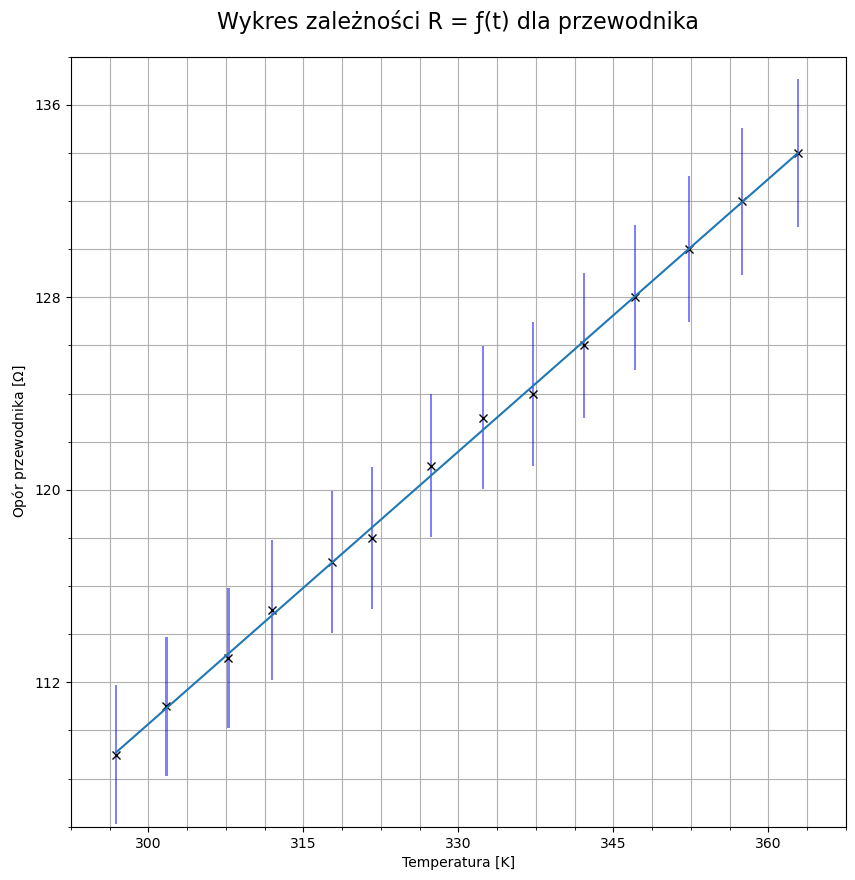

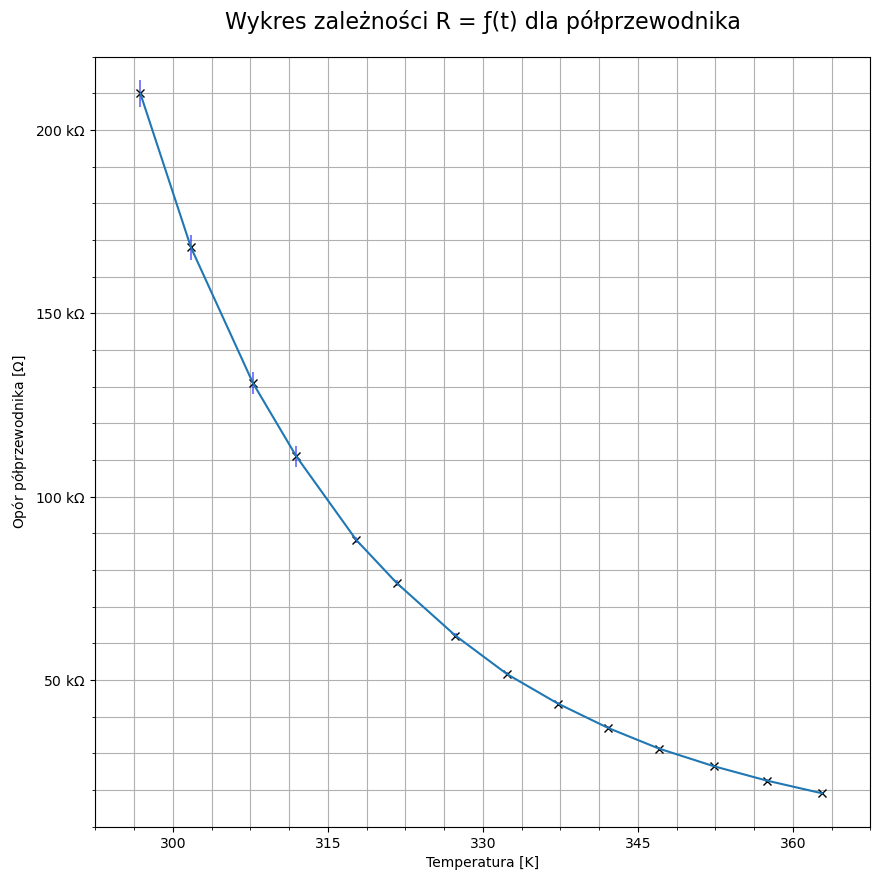

In [12]:
for obiekt in [przewodnik, polprzewodnik]:
    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Set plot size
    fig.set_figwidth(10) 
    fig.set_figheight(10)

        # Call function to create error boxes
    _ = make_error_boxes(ax, obiekt.x, obiekt.y, obiekt.xerr, obiekt.yerr)
    
    plt.plot(obiekt.x,obiekt.y, "kx")

    if (obiekt == polprzewodnik): 
        plt.plot(obiekt.x,obiekt.y)
    elif (obiekt == przewodnik):
        plt.plot(obiekt.x,obiekt.a*obiekt.x+obiekt.b)  # plot measurement regression line



    # Auto resize plot to major ticks
    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'

    # No padding inside plot
    #plt.autoscale(enable=True, axis='both', tight=True)

    # Add minor and major ticks and grid squares
    plt.minorticks_on()
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))

    # scientific notation
    if (obiekt == polprzewodnik):  
        #ax.ticklabel_format(axis="y", style='sci', useMathText=True, scilimits=(0, 0))
        ax.yaxis.set_major_formatter(EngFormatter(unit=r'$\Omega$'))

    x_minor_ticks = ax.xaxis.get_minorticklocs()
    y_minor_ticks = ax.yaxis.get_minorticklocs()
    
    ax.set_xlim(x_minor_ticks[0], x_minor_ticks[-1])
    ax.set_ylim(y_minor_ticks[0], y_minor_ticks[-1])

    ax.grid(visible=True, which='minor')
    ax.grid(visible=True, which='major')
    

    # Adding labels
    s = "Opór "+obiekt.conjugated_name+r" [$\Omega$]"
    ax.set_ylabel(s)
    ax.set_xlabel(f"Temperatura [K]")

    plt.title("Wykres zależności R = ƒ(t) dla "+obiekt.conjugated_name, size=16, pad=20)

    # equation
    #plt.text(np.median(obiekt.x),np.median(obiekt.y), f"R = ƒ(t)")

    plt.savefig(f"wykres_opor_{obiekt.ascii_name}.svg",format="svg", bbox_inches='tight', pad_inches=0)
    plt.show()


In [13]:
przewodnictwo = copy.copy(polprzewodnik)
przewodnictwo.ascii_name = "przewodnictwo"
przewodnictwo.conjugated_name = "przewodnictwa"

In [14]:
for object in [przewodnictwo]:
    object.dane["1/T [1/K]"] = [1/e for e in object.dane["T [K]"]]
    object.dane["blad 1/T [1/K]"] = [dT/T**2 for (dT,T) in zip(object.dane["blad T [K]"],object.dane["T [K]"])]
    object.dane["ln(1/R) [ln(1/Ω)]"] = [-np.log(e) for e in object.dane["R [Ω]"]]
    object.dane["blad ln(1/R) [ln(1/Ω)]"] = [dR/R for (dR,R) in zip(object.dane["blad R [Ω]"],object.dane["R [Ω]"])]
    
    object.x = object.dane["1/T [1/K]"]
    object.xerr = np.array([object.dane["blad 1/T [1/K]"], object.dane["blad 1/T [1/K]"]])
    object.y = object.dane["ln(1/R) [ln(1/Ω)]"]
    object.yerr = np.array([object.dane["blad ln(1/R) [ln(1/Ω)]"], object.dane["blad ln(1/R) [ln(1/Ω)]"]])

In [15]:
for obiekt in [przewodnictwo]:
   
    # Calculate linear regression, intercept calculated normally
    degrees = [0,1] # model y = ax + b
    matrix = np.stack([obiekt.x**d for d in degrees], axis=-1)
    result = np.linalg.lstsq(matrix,obiekt.y,rcond=None)
    
    obiekt.a = result[0][1]
    obiekt.b = result[0][0]
    residuals = result[1][0]

    n = obiekt.n
    obiekt.blad_a = math.sqrt((residuals * n) / ((n-2)*(n*sum(obiekt.x**2) - (sum(obiekt.x))**2)))
    #Math.sqrt(se2/(n-2))*Math.sqrt(n/(n*sx2 - sx*sx))
    
    obiekt.blad_b = math.sqrt((residuals*sum(obiekt.x**2)) / ((n-2)*(n*sum(obiekt.x**2)-(sum(obiekt.x)**2))))
    #(Math.sqrt(se2/(n-2))*Math.sqrt(sx2/(n*sx2 - sx*sx)

    print("Przewodnictwo półprzewodnika")
    print(f"Współczynnik kierunkowy a: {phys_display(obiekt.a, obiekt.blad_a)} ", r"[K*ln(1/ohm)]")
    print(f"a: {obiekt.a} ")
    print(f"błąd a: {obiekt.blad_a} ")
    print("")
    print("b: ", phys_display(obiekt.b,obiekt.blad_b), r" [ln(1/ohm)]")
    print("b: ", obiekt.b)
    print(f"błąd b: ", obiekt.blad_b)
    print("")





Przewodnictwo półprzewodnika
Współczynnik kierunkowy a: (-3897.0±6.0)  [K*ln(1/ohm)]
a: -3897.4968491221457 
błąd a: 6.20777762388595 

b:  (0.88±0.02)  [ln(1/ohm)]
b:  0.8771535636246997
błąd b:  0.01893368163793639



In [16]:
for obiekt in [przewodnictwo]:
    obiekt.E_J = abs(obiekt.a * stala_boltzmanna_J * 2)
    obiekt.blad_E_J = abs(2 * stala_boltzmanna_J * obiekt.blad_a)
    obiekt.E_eV = abs(obiekt.a * stala_boltzmanna_eV * 2)
    obiekt.blad_E_eV = abs(2 * stala_boltzmanna_eV * obiekt.blad_a)

    print("Energia domieszkowa w J: ", phys_display(obiekt.E_J, obiekt.blad_E_J), " [J]")
    print("E: ", obiekt.E_J, " [J]")
    print("blad E: ", obiekt.blad_E_J, " [J]")

    print("Energia domieszkowa w eV: ", phys_display(obiekt.E_eV, obiekt.blad_E_eV), "[eV]")
    print("E: ", obiekt.E_eV, " [eV]")
    print("blad E: ", obiekt.blad_E_eV, " [eV]")

Energia domieszkowa w J:  (1.076e-19±2e-22)  [J]
E:  1.0762150254487284e-19  [J]
blad E:  1.7141523937281026e-22  [J]
Energia domieszkowa w eV:  (0.672±0.001) [eV]
E:  0.6717205847296093  [eV]
blad E:  0.0010698897720282344  [eV]


In [17]:
for object in [przewodnik, polprzewodnik, przewodnictwo]:
    print("Dane "+object.ascii_name)
    print(object.dane)
    with open(object.ascii_name+"_dane.csv", "w") as plik:
        plik.write(object.dane.to_csv(index=False))

Dane przewodnik
     T [K]  blad T [K]  R [Ω]  blad R [Ω]
0   296.85         0.1    109       2.872
1   301.75         0.1    111       2.888
2   307.75         0.1    113       2.904
3   311.95         0.1    115       2.920
4   317.75         0.1    117       2.936
5   321.65         0.1    118       2.944
6   327.35         0.1    121       2.968
7   332.35         0.1    123       2.984
8   337.25         0.1    124       2.992
9   342.15         0.1    126       3.008
10  347.05         0.1    128       3.024
11  352.35         0.1    130       3.040
12  357.45         0.1    132       3.056
13  362.85         0.1    134       3.072
Dane polprzewodnik
     T [K]  blad T [K]   R [Ω]  blad R [Ω]  1/T [1/K]  blad 1/T [1/K]  \
0   296.85         0.1  210000      3680.0   0.003369    1.134817e-06   
1   301.75         0.1  168000      3344.0   0.003314    1.098261e-06   
2   307.75         0.1  131000      3048.0   0.003249    1.055854e-06   
3   311.95         0.1  111000      2888.0 

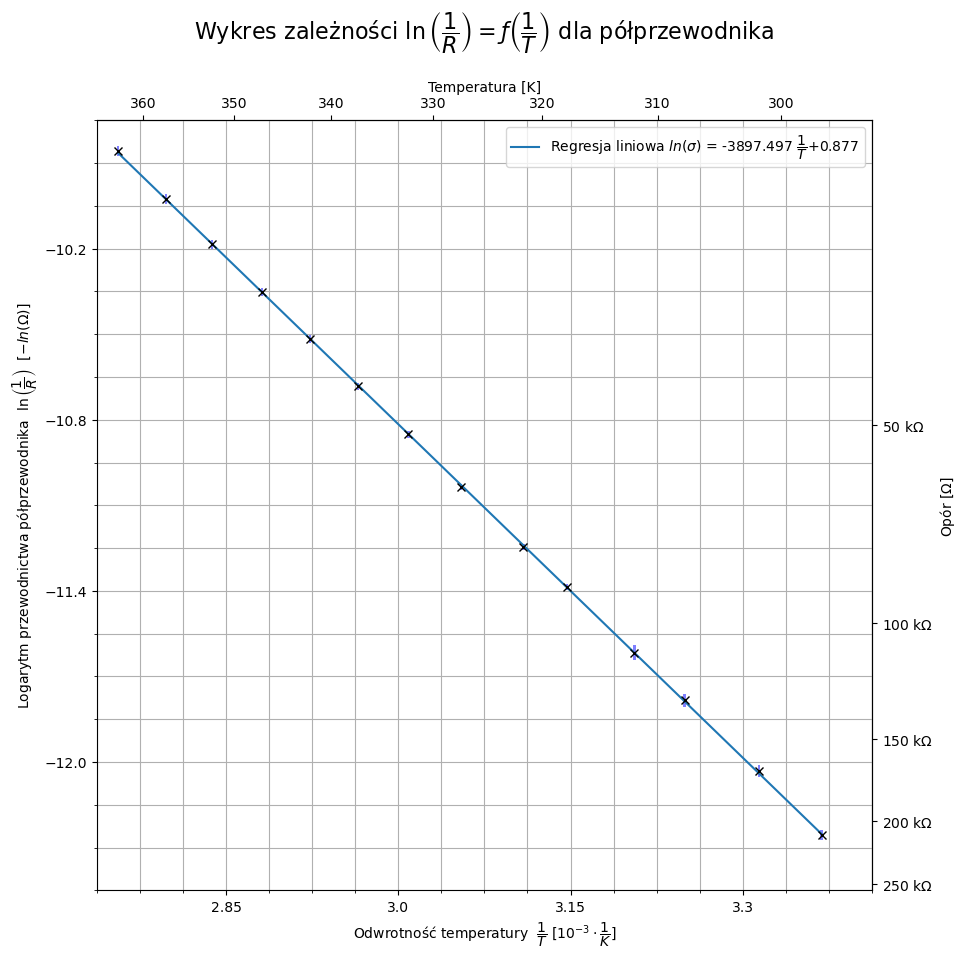

In [18]:
for obiekt in [przewodnictwo]:

    # Create figure and axes    
    fig, ax = plt.subplots(1)

    # Set plot size
    fig.set_figwidth(10) 
    fig.set_figheight(10)

        # Call function to create error boxes
    _ = make_error_boxes(ax, obiekt.x, obiekt.y, obiekt.xerr, obiekt.yerr)
    
    plt.plot(obiekt.x,obiekt.a*obiekt.x+obiekt.b, label=f"Regresja liniowa $ln($"+r"$\sigma$"+f") = {obiekt.a:.3f} "+r"$\dfrac{1}{T}$"+f"+{obiekt.b:.3f}")  # plot measurement regression line

    plt.plot(obiekt.x,obiekt.y, "kx")  # plot points
    

    # Auto resize plot to major ticks
    #plt.rcParams['axes.autolimit_mode'] = 'round_numbers'

    # No padding inside plot
    #plt.autoscale(enable=True, axis='both', tight=True)

    # Add minor and major ticks and grid squares
    plt.minorticks_on()
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    
    #ax.ticklabel_format(axis="x", style='sci', useMathText=True, scilimits=(0, 0))
    ax.xaxis.set_major_formatter(lambda x, pos: str(x*1000))
    
    x_minor_ticks = ax.xaxis.get_minorticklocs()
    y_minor_ticks = ax.yaxis.get_minorticklocs()
    
    ax.set_xlim(x_minor_ticks[0], x_minor_ticks[-1])
    ax.set_ylim(y_minor_ticks[0], y_minor_ticks[-1])

    ax.grid(visible=True, which='minor')
    ax.grid(visible=True, which='major')

    def one_over(x):
        """Vectorized 1/x, treating x==0 manually"""
        x = np.array(x, float)
        near_zero = np.isclose(x, 0)
        x[near_zero] = np.inf
        x[~near_zero] = 1 / x[~near_zero]
        return x


    def f(x):
        return np.exp(-x)

    def inv_f(x):
        x = np.array(x, float)
        near_zero = np.isclose(x, 0)
        x[near_zero] = np.inf
        x[~near_zero] = -np.log(x[~near_zero])
        return x
    
    ax2x = ax.secondary_xaxis('top', functions=(one_over, one_over))
    ax2x.set_xlabel('Temperatura [K]')

    ax2y = ax.secondary_yaxis('right', functions=(f, inv_f))
    ax2y.set_ylabel('Opór'+r' [$\Omega$]')
    ax2y.yaxis.set_major_formatter(EngFormatter(unit=r'$\Omega$'))

           
    # Adding labels
    s = "Logarytm "+obiekt.conjugated_name+" półprzewodnika "+r" $\ln\left(\dfrac{1}{R}\right)$ "+r" [$-ln(\Omega)$]"
    ax.set_ylabel(s)
    ax.set_xlabel(f"Odwrotność temperatury "+r" $\dfrac{1}{T}$ "+r"$[10^{-3} \cdot \dfrac{1}{K}]$")

    # equation
    plt.legend()
    plt.title("Wykres zależności "+r"$\ln\left(\dfrac{1}{R}\right) = ƒ\left(\dfrac{1}{T}\right)$ dla "+polprzewodnik.conjugated_name, size=16, pad=30)

    plt.savefig(f"wykres_{obiekt.ascii_name}.svg",format="svg", bbox_inches='tight', pad_inches=0)
    plt.show()

### W zakresie temperatur stosowanym w laboratorium obserwujemy tylko przewodnictwo domieszkowe
